In [1]:
import os
import sys

parent_path = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir)))
if (not (parent_path in sys.path)):
    sys.path.append(parent_path)

# Set directory to parent directory of notebooks
os.chdir(parent_path) 
    
from src.utils import process_plot_data, generate_stripplot, plot_gene_celltype_correlation
import pandas as pd
os.getcwd()

'c:\\Users\\victo\\Forskningspraktik\\survivalplot'

## Load in data 

In [2]:
GSE78220_data_qs = pd.read_csv("GSE78220_normaliserad_filer/GSE78220_data_qs.csv", index_col=0)
GSE78220_data_qs.head()

,Symbol,GSM2069823,GSM2069824,GSM2069825,GSM2069826,GSM2069827,GSM2069828,GSM2069829,GSM2069830,GSM2069831,...,GSM2069841,GSM2069842,GSM2069843,GSM2069844,GSM2069845,GSM2069846,GSM2069847,GSM2069848,GSM2069849,GSM2069850
1,A1BG,6.889097,206.466877,5.898350,7.654231,1.852725,12.219533,6.109492,5.098079,3.756723,...,18.963386,3.833460,4.658472,4.263998,4.427123,10.149806,8.627985,7.817892,10.433869,2.584879
2,NAT2,0.028758,16.464292,0.111024,0.285515,0.068164,0.046852,0.030736,0.035267,0.020655,...,0.085310,0.013973,0.021301,0.320494,0.101194,0.000154,0.018377,0.024080,0.001405,0.007132
3,ADA,11.332855,6.897428,14.844041,21.061137,3.651512,10.520665,8.282411,8.544901,10.679005,...,32.032146,5.598783,2.756178,14.181502,9.609500,21.131104,11.572463,18.983650,29.857904,26.302853
4,CDH2,22.011609,15.190255,44.594648,10.013215,4.825417,0.103632,1.365131,1.165910,46.302287,...,1.535061,24.661559,21.066053,0.341010,1.701542,1.577429,44.820329,0.258317,12.414237,3.944813
5,AKT3,48.313567,34.701721,30.998345,34.584468,11.981855,17.890281,8.890926,11.400316,21.787557,...,8.918915,23.085954,31.244420,2.556953,10.773940,15.346811,16.036611,16.696718,22.012087,5.102058


In [3]:
GSE78220_qs_metadata = pd.read_csv("GSE78220_normaliserad_filer/GSE78220_qs_metadata.csv")
GSE78220_qs_metadata.rename(columns={'Unnamed: 0':'Mixture'}, inplace=True)
GSE78220_qs_metadata.head()

,Mixture,ID_REF,source_name,tissue,response,treatment,biopsy_time,previous_mapki,sex,age,...,X4556,X4519,X4576,X4571,SIAC1QB,SIAC1QA,SIAC1QC,SIAC1QAC,response_ordinal,response2
0,GSM2069823,Pt1,tumor biopsy_Progressive Disease,Melanoma biopsies,Progressive Disease,Pembrolizumab,pre-treatment,N,F,66,...,1251.663976,3117.831450,39.765223,697.975257,0.024704,0.023254,0.031563,0.008683,Progressive Disease,Non-response
1,GSM2069824,Pt2,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,55,...,1672.906289,7309.439300,84.670507,879.509532,0.028389,0.037026,0.036886,0.011193,Partial Response,Response
2,GSM2069825,Pt4,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,62,...,2710.457635,13147.955825,273.769071,2890.617786,0.029880,0.024970,0.028878,0.009247,Partial Response,Response
3,GSM2069826,Pt5,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,61,...,71.076374,167.690889,3.651914,50.839306,0.012998,0.017261,0.017357,0.005195,Partial Response,Response
4,GSM2069827,Pt6,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,51,...,4322.250809,15247.764765,440.559240,3920.757318,0.002482,0.002571,0.002190,0.000801,Partial Response,Response


In [4]:
deconvolved_data_ciber = pd.read_csv("GSE78220_normaliserad_filer/CIBERSORT_deconvolved_GSE78220.csv")
deconvolved_data_ciber.head()

,Mixture,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells,P-value,Correlation,RMSE
0,GSM2069823,0.583072,0.017125,0.287329,0.004688,0.0,0.087975,0.008812,0.010999,0,0.476497,0.879068
1,GSM2069824,0.743163,0.018499,0.032298,0.007606,0.0,0.187097,0.011337,0.000000,0,0.127431,1.103183
2,GSM2069825,0.858987,0.000334,0.039995,0.005105,0.0,0.093667,0.000880,0.001032,0,0.743819,0.684138
3,GSM2069826,0.976568,0.000528,0.007294,0.000000,0.0,0.013782,0.001827,0.000000,0,0.687683,0.728626
4,GSM2069827,0.816200,0.000453,0.067759,0.000000,0.0,0.107401,0.008187,0.000000,0,0.679527,0.740109


## Functions used for data analysis, processing and visualization

## Create the plot

### Calculate celltype SIA score

In [5]:
# Calculate celltype-based SIA score
deconvolved_data_ciber["SIA celltype"] = deconvolved_data_ciber["T cells CD8"] / (deconvolved_data_ciber["Macrophages"] + deconvolved_data_ciber["T cells CD8"])
deconvolved_data_ciber.head()

,Mixture,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells,P-value,Correlation,RMSE,SIA celltype
0,GSM2069823,0.583072,0.017125,0.287329,0.004688,0.0,0.087975,0.008812,0.010999,0,0.476497,0.879068,0.050593
1,GSM2069824,0.743163,0.018499,0.032298,0.007606,0.0,0.187097,0.011337,0.000000,0,0.127431,1.103183,0.039067
2,GSM2069825,0.858987,0.000334,0.039995,0.005105,0.0,0.093667,0.000880,0.001032,0,0.743819,0.684138,0.051684
3,GSM2069826,0.976568,0.000528,0.007294,0.000000,0.0,0.013782,0.001827,0.000000,0,0.687683,0.728626,0.000000
4,GSM2069827,0.816200,0.000453,0.067759,0.000000,0.0,0.107401,0.008187,0.000000,0,0.679527,0.740109,0.000000


In [6]:
GSE78220_qs_metadata["SIA celltype"] = deconvolved_data_ciber["SIA celltype"]
GSE78220_qs_metadata.head()

,Mixture,ID_REF,source_name,tissue,response,treatment,biopsy_time,previous_mapki,sex,age,...,X4519,X4576,X4571,SIAC1QB,SIAC1QA,SIAC1QC,SIAC1QAC,response_ordinal,response2,SIA celltype
0,GSM2069823,Pt1,tumor biopsy_Progressive Disease,Melanoma biopsies,Progressive Disease,Pembrolizumab,pre-treatment,N,F,66,...,3117.831450,39.765223,697.975257,0.024704,0.023254,0.031563,0.008683,Progressive Disease,Non-response,0.050593
1,GSM2069824,Pt2,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,55,...,7309.439300,84.670507,879.509532,0.028389,0.037026,0.036886,0.011193,Partial Response,Response,0.039067
2,GSM2069825,Pt4,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,62,...,13147.955825,273.769071,2890.617786,0.029880,0.024970,0.028878,0.009247,Partial Response,Response,0.051684
3,GSM2069826,Pt5,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,61,...,167.690889,3.651914,50.839306,0.012998,0.017261,0.017357,0.005195,Partial Response,Response,0.000000
4,GSM2069827,Pt6,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,51,...,15247.764765,440.559240,3920.757318,0.002482,0.002571,0.002190,0.000801,Partial Response,Response,0.000000


In [7]:
plot_data = process_plot_data(GSE78220_qs_metadata)
plot_data.head()

,SIAC1QA,SIAC1QB,SIAC1QC,SIA celltype,response,ID_REF
0,0.023254,0.024704,0.031563,0.050593,non-responder,Pt1
1,0.037026,0.028389,0.036886,0.039067,partial response,Pt2
2,0.024970,0.029880,0.028878,0.051684,partial response,Pt4
3,0.017261,0.012998,0.017357,0.000000,partial response,Pt5
4,0.002571,0.002482,0.002190,0.000000,partial response,Pt6


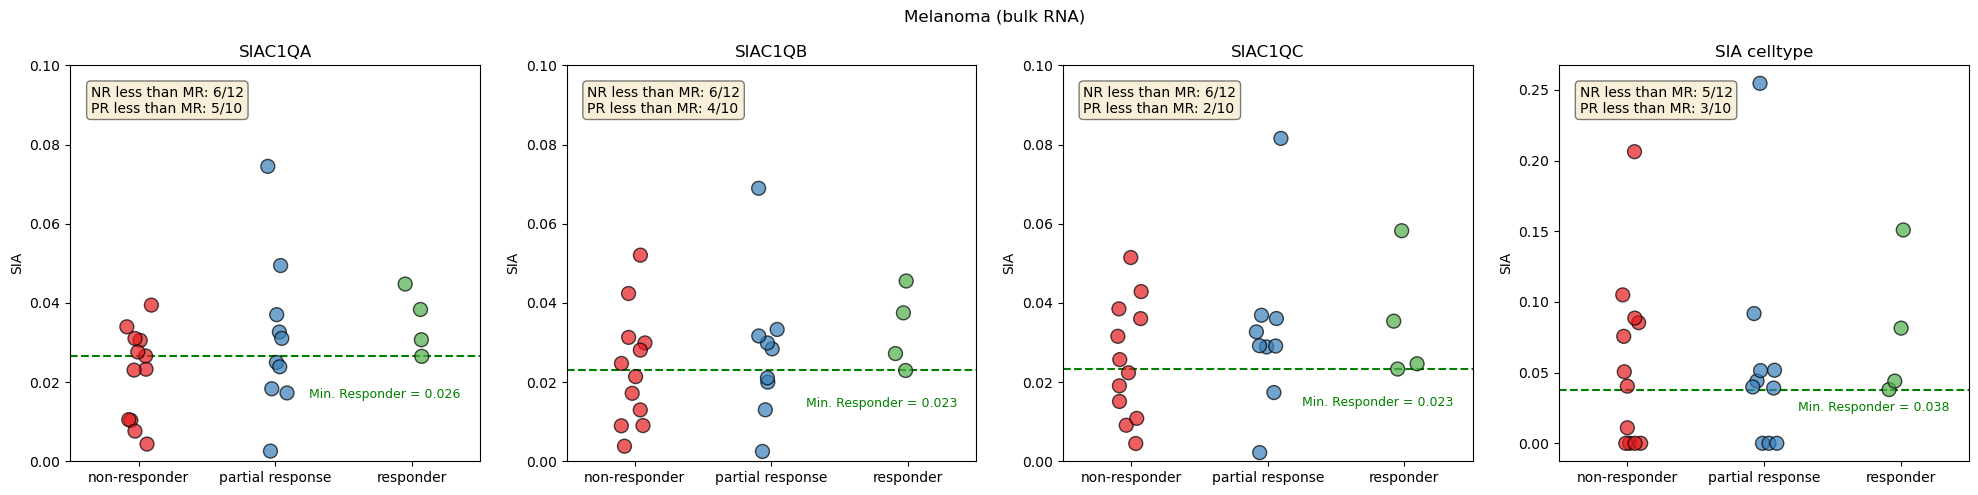

In [8]:
generate_stripplot(plot_data)

# Investigate Correlation Between Gene Expression and Celltypes

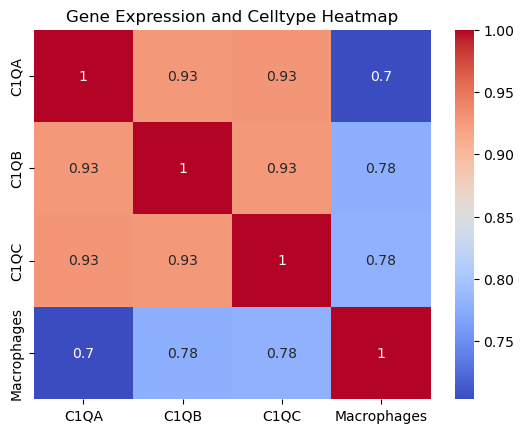

In [9]:
plot_gene_celltype_correlation(GSE78220_data_qs, deconvolved_data_ciber, ["C1QA", "C1QB", "C1QC"], "Macrophages")

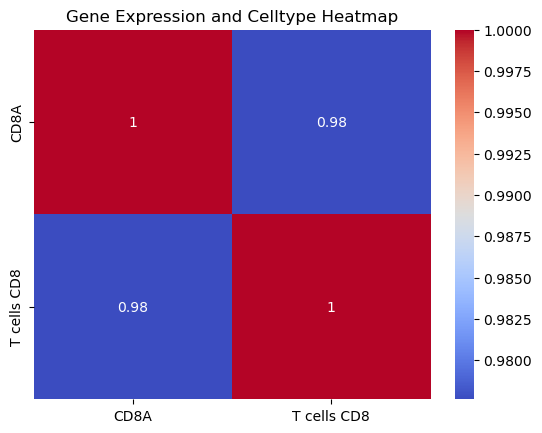

In [10]:
plot_gene_celltype_correlation(GSE78220_data_qs, deconvolved_data_ciber, ["CD8A"], "T cells CD8")